In [5]:
# install required packages
!pip install python==3.10.9
!pip install pandas
!pip install numpy
!pip install matplotlib

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# how to create a new data source
# new_df = pd.DataFrame(columns=df_input.columns, data=np.repeat(df_input.iloc[0].values[None, ...], repeats=2000, axis=0))
# new_df["Applicant ID"] = np.arange(new_df.shape[0])+1
# new_df.fillna(value="N/A", inplace=True)
# # new_df.head()
# new_df.to_csv("resume_scorer_full.csv", index=False)

# Model Consistency Test on the Resume Scorer

One fundamental intuition of a resume scorer, or, for any machine learning model, once, it’s deployed, is that the model should produce the same output for the same input. More importantly, consistency is an asymptotic property that guarantees better convergence of the algorithm when given more training data. Formally, a learning algorithm is said to be consistent with respect to a certain distribution of $[X, Y]$ if the risk of the returned model converges in probability to the Bayes risk $R$, when $N$ goes to infinity:
$$
\forall \epsilon > 0, \lim_{N \rightarrow +\infty} P({D_N: R(f_N) - R* > \epsilon})
$$

We defined the Consistency Score (CS) as 
$$
\text{CS}_{i, j} = \begin{cases}
    1 & \text{if } x_{i} = x_{j} \text{ and } y_i = y_j\\
    0 & \text{otherwise} 
\end{cases}
$$

We created a dataset which contains $N$ same data points, and got model predictions by submitting the dataset to API. And since we don't have the ground truth score for each data point, we use the average score as the ground truth. The Consistency Score (CS) on the dataset can then be transformed to:
$$
\text{CS} = \frac {1} {N} \sum_{i=1}^{N} I \cdot (x_i = \bar {x})
$$
The transformed Consistency Score ranges from 0 to 1, and the higher value it takes, the better consistency level the model is in.

In [113]:
df_input = pd.read_csv("resume_scorer_full.csv")
df_output = pd.read_csv("result_full.csv")

In [114]:
df_input

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3
0,1,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,1997,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,1998,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,1999,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
df_output

,applicant_id,score
0,0,1.95
1,1,6.02
2,2,8.95
3,3,4.19
4,4,9.60
...,...,...
1995,1995,1.38
1996,1996,2.19
1997,1997,8.75
1998,1998,6.50


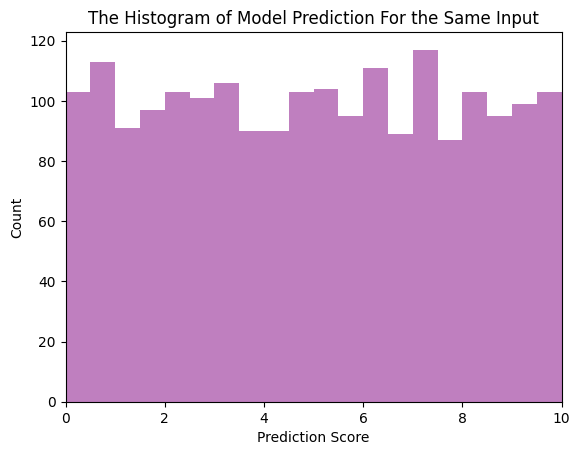

In [105]:
plt.title("The Histogram of Model Prediction For the Same Input")
plt.hist(df_output["score"], bins=20, color="purple", alpha=0.5)
plt.xlim(left=0, right=10)
plt.xlabel("Prediction Score")
plt.ylabel("Count")
# plt.show()
plt.savefig(fname="consistency_hist.pdf", format="pdf")

In [106]:
avg = df_output["score"].mean()
std = df_output["score"].std()
print(f"The average of prediction scores for same data points is {avg:.2f}. The standard deviation of prediction score for same data points is {std:.2f}, and therefore the Confidence Interval of the prediction score, under the confidence level of 0.95, is [{avg - 1.96*std:.2f}, {avg + 1.96*std:.2f}]")

The average of prediction scores for same data points is 4.98. The standard deviation of prediction score for same data points is 2.90, and therefore the Confidence Interval of the prediction score, under the confidence level of 0.95, is [-0.70, 10.65]


# Model Consistency Test on the Candidate Evaluator
We combined the input dataset and the resume scores returned by the resume scorer, and feed the combined dataset to the candidate evaluator model. The result returned by the candidate evaluator

In [119]:
df_for_candidate_evaluator = df_input.copy()
df_for_candidate_evaluator["Resume score"] = df_output["score"].values
df_for_candidate_evaluator.fillna(value="N/A", inplace=True)
df_for_candidate_evaluator.to_csv("consistency_test_for_candidate_evaluator.csv", index=False)

/var/folders/cd/mt3mnkz168n9wr_y2d10dqb80000gn/T/ipykernel_45661/2844825904.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_for_candidate_evaluator.fillna(value="N/A", inplace=True)


In [121]:
df_for_candidate_evaluator.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,Resume score
0,1,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,1.95
1,2,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,6.02
2,3,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,8.95
3,4,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,4.19
4,5,Providence University,3.81,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,9.60


In [122]:
df_output = pd.read_csv("result_cosistency_ce.csv")
df_output.head()

,applicant_id,prediction
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


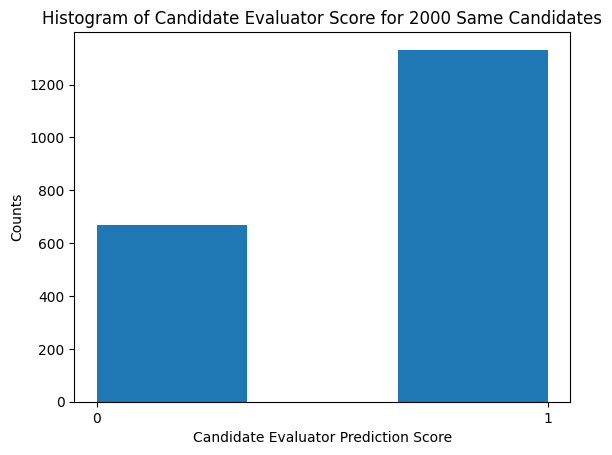

In [133]:
plt.title("Histogram of Candidate Evaluator Score for 2000 Same Candidates")
plt.hist(df_output["prediction"], bins=3, )
plt.ylabel("Counts")
plt.xlabel("Candidate Evaluator Prediction Score")
plt.xticks([0, 1])
# plt.show()
plt.savefig(fname="ce_consis_hist.pdf", format="pdf")

# Model Meritocratic Test on the Resume Scorer

In [52]:
df_input = pd.read_csv("/Users/chemstriker/CSCI1951Z/resume_scorer_discriminative/resume_scorer_gpa.csv")
df_output = pd.read_csv("/Users/chemstriker/CSCI1951Z/resume_scorer_discriminative/result_gpa_rs.csv")

In [53]:
df_input

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3
0,1,Providence University,0.00,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Providence University,0.04,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Providence University,0.08,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Providence University,0.12,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Providence University,0.16,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Providence University,3.84,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,97,Providence University,3.88,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,98,Providence University,3.92,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,99,Providence University,3.96,Bachelors,Providence,M,1,1,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


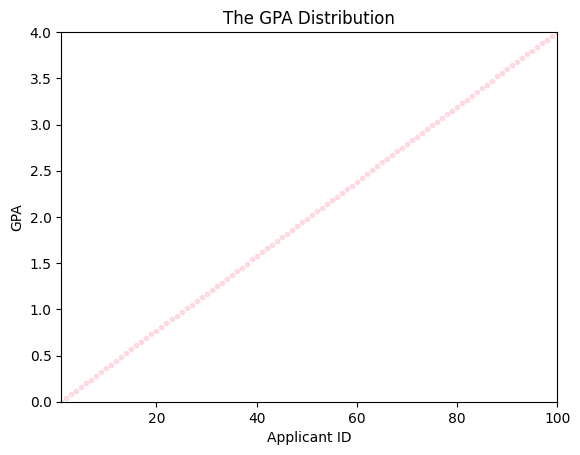

In [54]:
plt.title("The GPA Distribution")
plt.scatter(df_input["Applicant ID"], df_input["GPA"], color="pink", alpha=0.5, marker=".")
plt.xlim(left=1, right=100)
plt.ylim(bottom=0, top=4.0)
plt.xlabel("Applicant ID")
plt.ylabel("GPA")
plt.savefig(fname="GPA_distribution.pdf", format="pdf")

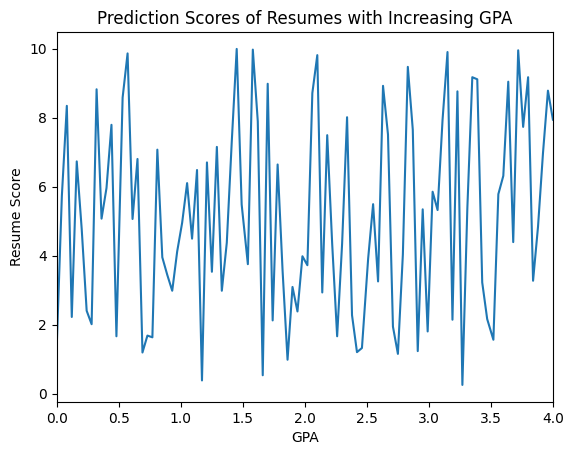

In [39]:
plt.title("Prediction Scores of Resumes with Increasing GPA")
plt.plot(df_input["GPA"].values, df_output["score"].values)
plt.xlim(left=0, right=4)
plt.xlabel("GPA")
plt.ylabel("Resume Score")
# plt.show()
plt.savefig("score_gpa.pdf", format="pdf")

# Model Meritocratic Test on the Candidate Evaluator

In [56]:
df_input = pd.read_csv("/Users/chemstriker/CSCI1951Z/resume_scorer_discriminative/resume_scorer_gpa.csv")
df_output = pd.read_csv("/Users/chemstriker/CSCI1951Z/resume_scorer_discriminative/result_gpa_ce.csv")

In [57]:
df_output

,applicant_id,prediction
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1
...,...,...
95,96,1
96,97,1
97,98,0
98,99,1


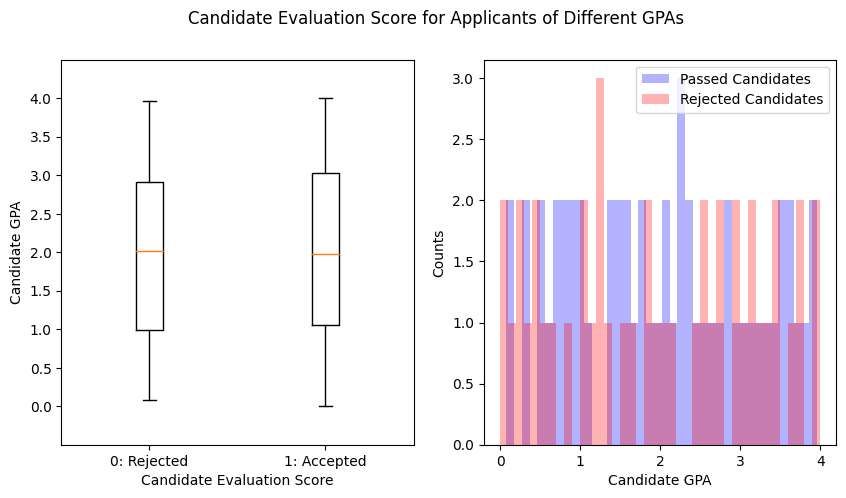

In [86]:
gpa_passed = df_input[df_output["prediction"] == 1]["GPA"]
gpa_unpassed = df_input[df_output["prediction"] == 0]["GPA"]
grouped_gpa = [gpa_passed, gpa_unpassed]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Candidate Evaluation Score for Applicants of Different GPAs")

ax1.boxplot(grouped_gpa)
# plt.scatter(df_input["GPA"], df_output["prediction"], color="blue", alpha=0.5, marker=".")
ax1.set_ylim(bottom=-0.5, top=4.5)
ax1.set_yticks(ticks=np.linspace(0, 4, 9))
# plt.ylim(bottom=-0.5, top=1.5)
ax1.set_xticks(ticks=[1, 2], labels=["0: Rejected", "1: Accepted"])
ax1.set_xlabel("Candidate Evaluation Score")
ax1.set_ylabel("Candidate GPA")

ax2.hist(gpa_passed, color="blue", alpha=0.3, label="Passed Candidates", bins=40)
ax2.hist(gpa_unpassed, color="red", alpha=0.3, label="Rejected Candidates", bins=40)
ax2.legend()
ax2.set_xlabel("Candidate GPA")
ax2.set_ylabel("Counts")

# plt.show()
plt.savefig(fname="gpa_candidate_evaluation.pdf", format="pdf")

In [74]:
print(f"The mean GPA of passed job applicants is {gpa_passed.mean():.2f}, the mean GPA of rejected job applicants is {gpa_unpassed.mean():.2f}")

The mean GPA of passed job applicants is 2.02, the mean GPA of rejected job applicants is 1.98


# Fairness Test for the Resume Scorer
Since the dataset we are using do not have ground-truth labels, i.e., we don't have actual resume scores or candidate choices, so we only experiment with fairness metrics not involved with ground-truth labels in this project.

These fairness metrics are:
- Statistical Parity (Demographic Parity)
- Disparate Impact

In [137]:
# make a random dataset to evaluate the fairness
# new_df = pd.DataFrame(columns=df_input.columns, data=np.repeat(df_input.iloc[0].values[None, ...], repeats=3000, axis=0))
# new_df["Applicant ID"] = np.arange(new_df.shape[0])+1
# new_df["GPA"] = np.round(np.random.random(new_df.shape[0]) * 4, 2).tolist()
# new_df["Gender"] = np.random.choice(["M", "W"], size=new_df.shape[0]).tolist()
# new_df["Veteran status"] = np.random.choice([0, 1], size=new_df.shape[0]).tolist()
# new_df["Work authorization"] = np.random.choice([0, 1], size=new_df.shape[0]).tolist()
# new_df["Disability"] = np.random.choice([0, 1], size=new_df.shape[0]).tolist()
# new_df["Ethnicity"] = np.random.choice([0, 1], size=new_df.shape[0]).tolist()
# new_df.fillna(value="N/A", inplace=True)
# # new_df.head()
# new_df.to_csv("resume_scorer_fairness.csv", index=False)

In [138]:
df_input = pd.read_csv("resume_scorer_fairness.csv")
df_output = pd.read_csv("result_fairness_rs.csv")

In [139]:
df_input.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,Role 1,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3
0,1,Providence University,1.55,Bachelors,Providence,W,1,1,1,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Providence University,1.86,Bachelors,Providence,W,1,0,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Providence University,2.44,Bachelors,Providence,W,0,0,0,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Providence University,2.43,Bachelors,Providence,M,0,1,1,0,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Providence University,1.23,Bachelors,Providence,M,0,0,1,1,Junior SWE,5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df_output.head()

,applicant_id,score
0,1,1.34
1,2,2.76
2,3,1.35
3,4,6.67
4,5,1.26


In [141]:
df_for_candidate_evaluator = df_input.copy()
df_for_candidate_evaluator["Resume score"] = df_output["score"].values
df_for_candidate_evaluator.fillna(value="N/A", inplace=True)
df_for_candidate_evaluator.to_csv("candidate_evaluator_fairness.csv", index=False)

/var/folders/cd/mt3mnkz168n9wr_y2d10dqb80000gn/T/ipykernel_45661/1093457636.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_for_candidate_evaluator.fillna(value="N/A", inplace=True)


In [149]:
df_output = pd.read_csv("result_fairness_ce.csv")
df_output.head()

,applicant_id,prediction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [150]:
df_for_candidate_evaluator["prediction"] = df_output["prediction"]

In [151]:
df_for_candidate_evaluator.head()

,Applicant ID,School Name,GPA,Degree,Location,Gender,Veteran status,Work authorization,Disability,Ethnicity,...,Start 1,End 1,Role 2,Start 2,End 2,Role 3,Start 3,End 3,Resume score,prediction
0,1,Providence University,1.55,Bachelors,Providence,W,1,1,1,1,...,5/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,1.34,0
1,2,Providence University,1.86,Bachelors,Providence,W,1,0,0,1,...,5/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,2.76,0
2,3,Providence University,2.44,Bachelors,Providence,W,0,0,0,1,...,5/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,1.35,0
3,4,Providence University,2.43,Bachelors,Providence,M,0,1,1,0,...,5/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,6.67,0
4,5,Providence University,1.23,Bachelors,Providence,M,0,0,1,1,...,5/20,N/A,N/A,N/A,N/A,N/A,N/A,N/A,1.26,0


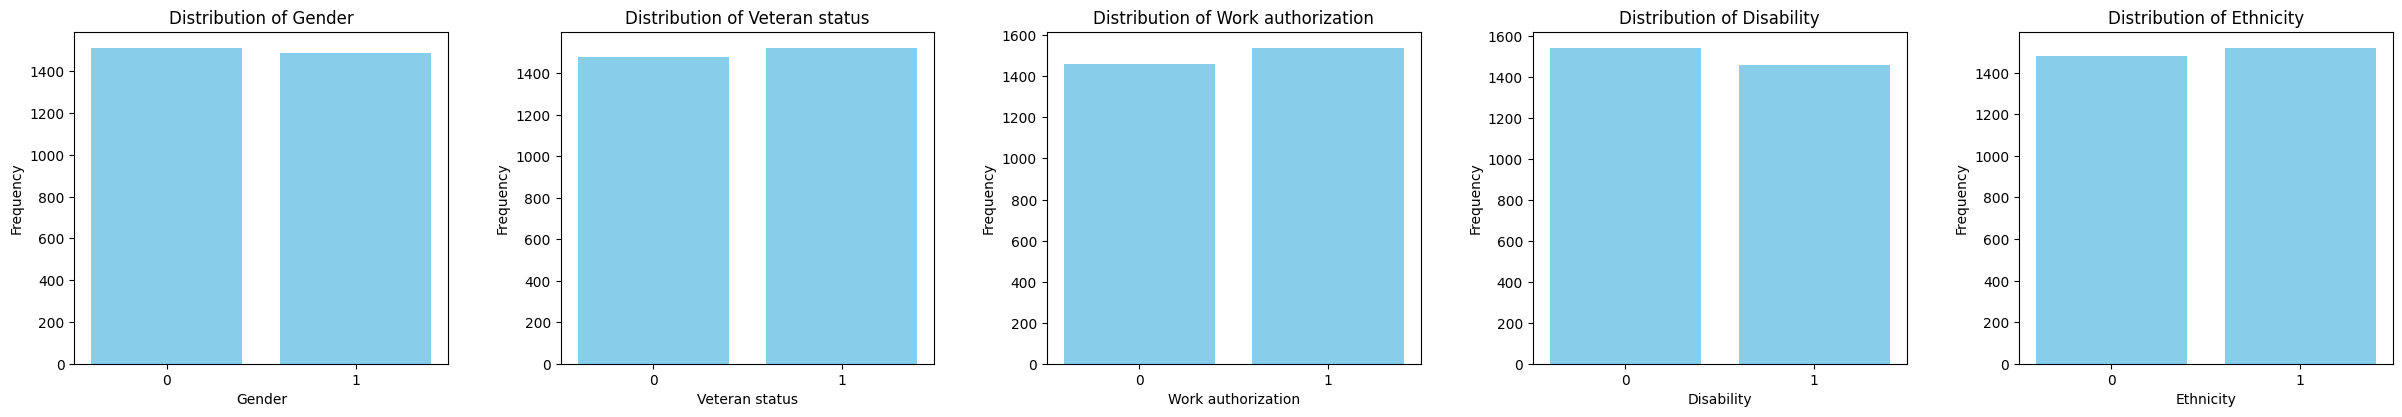

In [197]:
# plot distributions of sensitive attributes
sensitive_attributes = [
    "Gender", 
    "Veteran status", 
    "Work authorization", 
    "Disability",
    "Ethnicity"
]

fig, axes = plt.subplots(ncols=len(sensitive_attributes), figsize=(25, 5))
fig.tight_layout(pad=5.0)

for i, category in enumerate(sensitive_attributes):
    # Count the frequency of each category
    category_counts = df_for_candidate_evaluator[category].value_counts()
    
    # Create bar plot
    axes[i].bar(category_counts.index, category_counts.values, color='skyblue')
    axes[i].set_title(f'Distribution of {category}')
    axes[i].set_xticks([0, 1], [0, 1])
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(category)

plt.savefig(fname="sen_dist.pdf", format="pdf")

In [193]:
category_counts

Ethnicity
1    1520
0    1480
Name: count, dtype: int64

In [171]:
# calculate the Disparate Impact for the resume scorer
sensitive_attributes = [
    "Gender", 
    "Veteran status", 
    "Work authorization", 
    "Disability",
    "Ethnicity"
]
dis = []
for sa in sensitive_attributes:
    group_scores = df_for_candidate_evaluator.groupby(sa)["Resume score"].mean()
    print(group_scores)
    disparate_impact = min(group_scores) / max(group_scores)
    dis.append(disparate_impact)
    print("Disparate Impact:", disparate_impact)
    if disparate_impact >= 0.8:
        print("No significant Disparate Impact found.")
    else:
        print("Potential Disparate Impact detected.")

Gender
M    4.964095
W    4.981223
Name: Resume score, dtype: float64
Disparate Impact: 0.9965616389973951
No significant Disparate Impact found.
Veteran status
0    5.007510
1    4.938962
Name: Resume score, dtype: float64
Disparate Impact: 0.9863109101000026
No significant Disparate Impact found.
Work authorization
0    4.952486
1    4.991929
Name: Resume score, dtype: float64
Disparate Impact: 0.9920987911797342
No significant Disparate Impact found.
Disability
0    4.931018
1    5.016852
Name: Resume score, dtype: float64
Disparate Impact: 0.9828909251956263
No significant Disparate Impact found.
Ethnicity
0    4.970264
1    4.975138
Name: Resume score, dtype: float64
Disparate Impact: 0.9990201991931645
No significant Disparate Impact found.


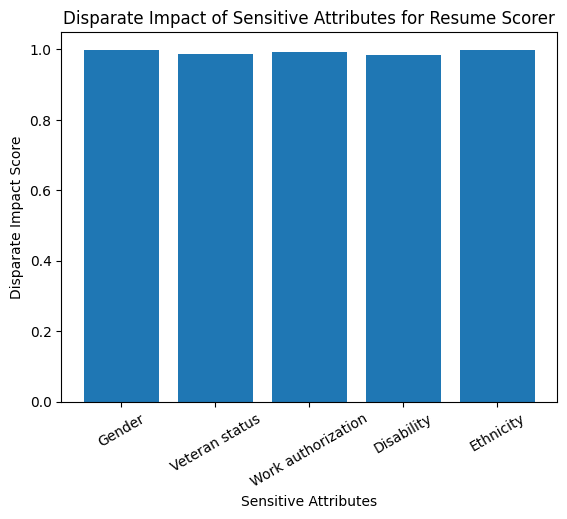

In [162]:
plt.title("Disparate Impact of Sensitive Attributes for Resume Scorer")
plt.bar(sensitive_attributes, dis)
plt.xlabel("Sensitive Attributes")
plt.ylabel("Disparate Impact Score")
plt.xticks(ticks=range(5), labels=sensitive_attributes, rotation=30)
plt.savefig(fname="disparate_impact_rs.pdf", format="pdf")
# plt.show()

In [184]:
df_for_candidate_evaluator.shape

(3000, 21)

In [165]:
group_scores = df_for_candidate_evaluator.groupby("Gender")["prediction"].mean()
group_scores

Gender
M    0.568931
W    0.000000
Name: prediction, dtype: float64

In [172]:
# calculate the Disparate Impact
sensitive_attributes = [
    "Gender", 
    "Veteran status", 
    "Work authorization", 
    "Disability",
    "Ethnicity"
]
dis_ce = []
for sa in sensitive_attributes:
    group_scores = df_for_candidate_evaluator.groupby(sa)["prediction"].mean()
    print(group_scores)
    disparate_impact = min(group_scores) / max(group_scores)
    dis_ce.append(disparate_impact)
    print("Disparate Impact:", disparate_impact)
    if disparate_impact >= 0.8:
        print("No significant Disparate Impact found.")
    else:
        print("Potential Disparate Impact detected.")

Gender
M    0.568931
W    0.000000
Name: prediction, dtype: float64
Disparate Impact: 0.0
Potential Disparate Impact detected.
Veteran status
0    0.282138
1    0.281866
Name: prediction, dtype: float64
Disparate Impact: 0.9990357254275425
No significant Disparate Impact found.
Work authorization
0    0.275342
1    0.288312
Name: prediction, dtype: float64
Disparate Impact: 0.9550166604961126
No significant Disparate Impact found.
Disability
0    0.285992
1    0.277778
Name: prediction, dtype: float64
Disparate Impact: 0.9712773998488285
No significant Disparate Impact found.
Ethnicity
0    0.279054
1    0.284868
Name: prediction, dtype: float64
Disparate Impact: 0.979589289058111
No significant Disparate Impact found.


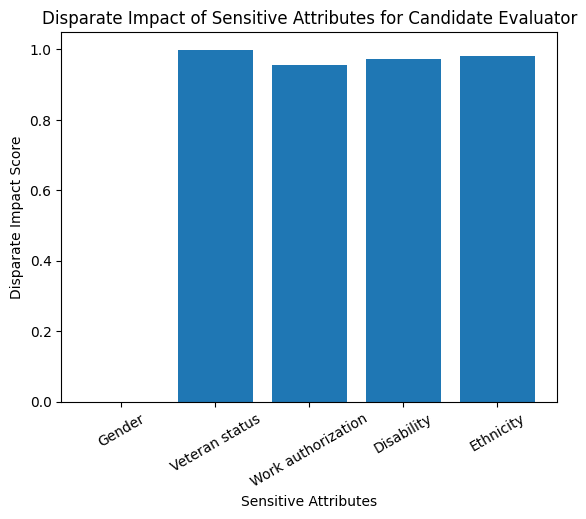

In [170]:
plt.title("Disparate Impact of Sensitive Attributes for Candidate Evaluator")
plt.bar(sensitive_attributes, dis)
plt.xlabel("Sensitive Attributes")
plt.ylabel("Disparate Impact Score")
plt.xticks(ticks=range(5), labels=sensitive_attributes, rotation=30)
plt.savefig(fname="disparate_impact_ce.pdf", format="pdf")
# plt.show()

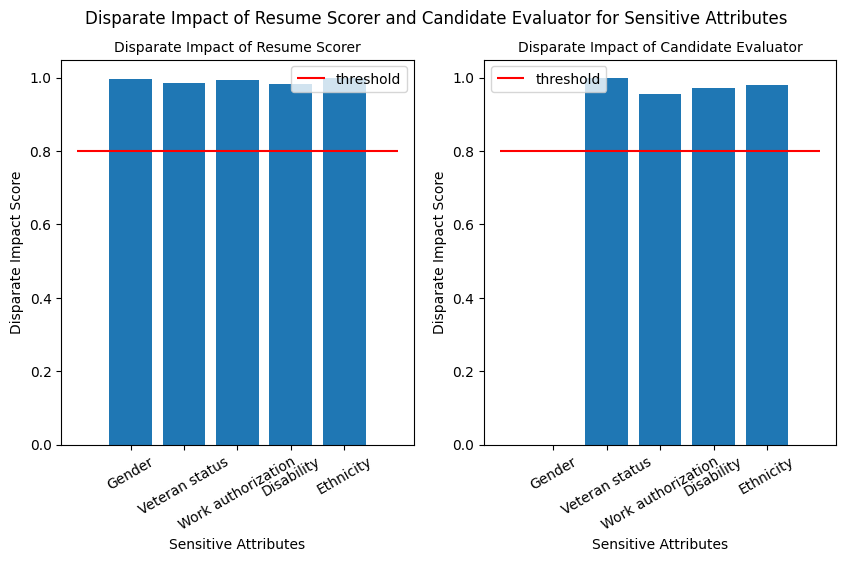

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Disparate Impact of Resume Scorer and Candidate Evaluator for Sensitive Attributes")

ax1.set_title("Disparate Impact of Resume Scorer", fontdict={'fontsize' : 10})
ax1.bar(sensitive_attributes, dis)
ax1.hlines(y=0.8, xmin=-1, xmax=5, label="threshold", color="red")
ax1.set_xlabel("Sensitive Attributes")
ax1.set_ylabel("Disparate Impact Score")
ax1.legend()
ax1.set_xticks(ticks=range(5), labels=sensitive_attributes, rotation=30)

ax2.set_title("Disparate Impact of Candidate Evaluator", fontdict={'fontsize' : 10})
ax2.bar(sensitive_attributes, dis_ce)
ax2.hlines(y=0.8, xmin=-1, xmax=5, label="threshold", color="red")
ax2.set_xlabel("Sensitive Attributes")
ax2.set_ylabel("Disparate Impact Score")
ax2.legend()
ax2.set_xticks(ticks=range(5), labels=sensitive_attributes, rotation=30)

# plt.show()
plt.savefig(fname="disparate_impact.pdf", format="pdf")

In [153]:
# calculate the separation
sensitive_attributes = [
    "Gender", 
    "Veteran status", 
    "Work authorization", 
    "Disability",
    "Ethnicity"
]

# Define thresholds for 'positive' predictions, e.g., scores that lead to hiring.
threshold = 8

for sa in sensitive_attributes:
    print(sa)
    # Calculate confusion matrix elements for each group
    for group in df_for_candidate_evaluator[sa].unique():
        subgroup = df_for_candidate_evaluator[df_for_candidate_evaluator[sa] == group]
        tp = ((subgroup['Resume score'] > threshold)  & (subgroup['prediction'] == 1)).sum()
        fp = ((subgroup['Resume score'] > threshold)  & (subgroup['prediction'] == 0)).sum()
        fn = ((subgroup['Resume score'] <= threshold) & (subgroup['prediction'] == 1)).sum()
        tn = ((subgroup['Resume score'] <= threshold) & (subgroup['prediction'] == 0)).sum()
    
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    
        print(f"Group: {group}, FPR: {fpr}, FNR: {fnr}")


Gender
Group: W, FPR: 0.20224719101123595, FNR: 0
Group: M, FPR: 0.21372854914196568, FNR: 0.8037825059101655
Veteran status
Group: 1, FPR: 0.19579139981701738, FNR: 0.7902097902097902
Group: 0, FPR: 0.21583411875589067, FNR: 0.8177458033573142
Work authorization
Group: 1, FPR: 0.20529197080291972, FNR: 0.8153153153153153
Group: 0, FPR: 0.2060491493383743, FNR: 0.7910447761194029
Disability
Group: 1, FPR: 0.19943019943019943, FNR: 0.817283950617284
Group: 0, FPR: 0.21162579473206175, FNR: 0.7913832199546486
Ethnicity
Group: 1, FPR: 0.21343146274149033, FNR: 0.812933025404157
Group: 0, FPR: 0.19775070290534208, FNR: 0.7941888619854721


In [156]:
# sufficiency
sensitive_attributes = [
    "Gender", 
    "Veteran status", 
    "Work authorization", 
    "Disability",
    "Ethnicity"
]
for sa in sensitive_attributes:
    # Group by score and calculate the actual average outcome
    predicted_groups = df_for_candidate_evaluator.groupby('Resume score')['prediction'].mean()
    
    # For each protected group
    for group in df_for_candidate_evaluator[sa].unique():
        subgroup = df_for_candidate_evaluator[df_for_candidate_evaluator[sa] == group]
        subgroup_means = subgroup.groupby('Resume score')['prediction'].mean()
        comparison = pd.concat([predicted_groups, subgroup_means], axis=1, keys=['Overall', group])
        
        print(f"Comparison for group {group}:\n{comparison}")


Comparison for group W:
               Overall    W
Resume score               
0.00          0.333333  0.0
0.01          0.000000  0.0
0.02          0.333333  0.0
0.03          0.000000  0.0
0.04          0.250000  0.0
...                ...  ...
9.96          0.000000  0.0
9.97          0.500000  NaN
9.98          0.500000  0.0
9.99          0.200000  0.0
10.00         0.400000  0.0

[953 rows x 2 columns]
Comparison for group M:
               Overall         M
Resume score                    
0.00          0.333333  0.500000
0.01          0.000000       NaN
0.02          0.333333  0.500000
0.03          0.000000       NaN
0.04          0.250000  0.333333
...                ...       ...
9.96          0.000000  0.000000
9.97          0.500000  0.500000
9.98          0.500000  1.000000
9.99          0.200000  0.500000
10.00         0.400000  0.666667

[953 rows x 2 columns]
Comparison for group 1:
               Overall    1
Resume score               
0.00          0.333333  0.5
0.0